In [1]:
import pandas as pd
import numpy as np
import pickle 

from docx import Document
from docx.shared import Inches
import pickle
import boto3
import sys
import pandas as pd
import json
from sqlalchemy import create_engine
import time
S3 = boto3.resource('s3')
from blupy.connections.db_connections import query_in_db as query_in_db
from docx.enum.text import WD_ALIGN_PARAGRAPH

import numpy as np
import matplotlib.pyplot as plt
import six


def extract_file_as_string(path):
    s3_object = S3.Object('blu-etl', path)
    return s3_object.get()['Body'].read().decode('utf-8')



def connect(credentials_name):
    credentials = json.loads(extract_file_as_string(
        'credentials/' + credentials_name))
    
    return create_engine('postgresql://{0}:{1}@{2}:{3}/{4}'
                        .format(credentials['user'], 
                                credentials['passwd'],
                                credentials['host'],
                                credentials['port'],
                                credentials['dbname']))

In [2]:
def render_mpl_table(data, col_width=4, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [3]:
# Perobas
talked_clients_perobas = pickle.load( open( "./data/talked_clients_perobas.pickle", "rb" ) )
original_number_perobas = pickle.load( open( "./data/original_number_perobas.pickle", "rb" ) )
to_contact_number_perobas = pickle.load( open( "./data/to_contact_number_perobas.pickle", "rb" ) )
already_talked_last_days_perobas = pickle.load( open( "./data/already_talked_last_days_perobas.pickle", "rb" ) )
number_null_emails_perobas = pickle.load( open( "./data/number_null_emails_perobas.pickle", "rb" ) )
original_dept_perobas = pickle.load( open( "./data/original_dept_perobas.pickle", "rb" ) )
to_contact_segmentos_perobas = pickle.load( open( "./data/to_contact_segmentos_perobas.pickle", "rb" ) )
null_emails_segmentos_perobas = pickle.load( open( "./data/null_emails_segmentos_perobas.pickle", "rb" ) )
last_days_segmento_perobas = pickle.load( open( "./data/last_days_segmento_perobas.pickle", "rb" ) )
ticket_table_dept_perobas = pickle.load( open( "./data/ticket_table_dept_perobas.pickle", "rb" ) )
already_talked_segmento_perobas =  pickle.load( open( "./data/already_talked_segmento_perobas.pickle", "rb" ) )

In [4]:
already_talked_segmento_perobas

,segmentos,filtrados_por_segmento
0,Colchões,3
1,Móveis,2


In [5]:
variables = ['segmentos', 'total_por_segmento', 'filtrados_por_segmento' ,'falados_por_segmento', 'faltantes_por_segmento']

In [6]:
perobas_segmento = None
perobas_segmento = original_dept_perobas.merge(already_talked_segmento_perobas, on = 'segmentos', how = 'left')
perobas_segmento = perobas_segmento.merge(ticket_table_dept_perobas, on = 'segmentos', how = 'left')
perobas_segmento = perobas_segmento.merge(to_contact_segmentos_perobas, on = 'segmentos', how = 'left')
perobas_segmento.fillna(0, inplace = True)
perobas_segmento= perobas_segmento[variables]

In [7]:
# Boleto Blu
talked_clients_boleto_blu = pickle.load( open( "./data/talked_clients_boleto_blu.pickle", "rb" ) )
original_number_boleto_blu = pickle.load( open( "./data/original_number_boleto_blu.pickle", "rb" ) )
to_contact_number_boleto_blu = pickle.load( open( "./data/to_contact_number_boleto_blu.pickle", "rb" ) )
already_talked_last_days_boleto_blu = pickle.load( open( "./data/already_talked_last_days_boleto_blu.pickle", "rb" ) )
number_null_emails_boleto_blu = pickle.load( open( "./data/number_null_emails_boleto_blu.pickle", "rb" ) )
original_dept_boleto_blu = pickle.load( open( "./data/original_dept_boleto_blu.pickle", "rb" ) )
to_contact_segmentos_boleto_blu = pickle.load( open( "./data/to_contact_segmentos_boleto_blu.pickle", "rb" ) )
null_emails_segmentos_boleto_blu = pickle.load( open( "./data/null_emails_segmentos_boleto_blu.pickle", "rb" ) )
last_days_segmento_boleto_blu = pickle.load( open( "./data/last_days_segmento_boleto_blu.pickle", "rb" ) )
ticket_table_dept_boleto_blu = pickle.load( open( "./data/ticket_table_dept_boleto_blu.pickle", "rb" ) )
already_talked_segmento_boleto_blu =  pickle.load( open( "./data/already_talked_segmento_boleto_blu.pickle", "rb" ) )

In [8]:
boleto_blu_segmento = None
boleto_blu_segmento = original_dept_boleto_blu.merge(already_talked_segmento_boleto_blu, on = 'segmentos', how = 'left')
boleto_blu_segmento = boleto_blu_segmento.merge(ticket_table_dept_boleto_blu, on = 'segmentos', how = 'left')
boleto_blu_segmento = boleto_blu_segmento.merge(to_contact_segmentos_boleto_blu, on = 'segmentos', how = 'left')
boleto_blu_segmento.fillna(0, inplace = True)
boleto_blu_segmento = boleto_blu_segmento[variables]

In [9]:
# Reserva
talked_clients_reserva = pickle.load( open( "./data/talked_clients_reserva.pickle", "rb" ) )
original_number_reserva = pickle.load( open( "./data/original_number_reserva.pickle", "rb" ) )
to_contact_number_reserva = pickle.load( open( "./data/to_contact_number_reserva.pickle", "rb" ) )
already_talked_last_days_reserva = pickle.load( open( "./data/already_talked_last_days_reserva.pickle", "rb" ) )
number_null_emails_reserva = pickle.load( open( "./data/number_null_emails_reserva.pickle", "rb" ) )
original_dept_reserva = pickle.load( open( "./data/original_dept_reserva.pickle", "rb" ) )
to_contact_segmentos_reserva = pickle.load( open( "./data/to_contact_segmentos_reserva.pickle", "rb" ) )
null_emails_segmentos_reserva = pickle.load( open( "./data/null_emails_segmentos_reserva.pickle", "rb" ) )
last_days_segmento_reserva = pickle.load( open( "./data/last_days_segmento_reserva.pickle", "rb" ) )
ticket_table_dept_reserva = pickle.load( open( "./data/ticket_table_dept_reserva.pickle", "rb" ) )
already_talked_segmento_reserva =  pickle.load( open( "./data/already_talked_segmento_reserva.pickle", "rb" ) )

In [10]:
reserva_segmento = None
reserva_segmento = original_dept_reserva.merge(already_talked_segmento_reserva, on = 'segmentos', how = 'left')
reserva_segmento = reserva_segmento.merge(ticket_table_dept_reserva, on = 'segmentos', how = 'left')
reserva_segmento = reserva_segmento.merge(to_contact_segmentos_reserva, on = 'segmentos', how = 'left')
reserva_segmento.fillna(0, inplace = True)
reserva_segmento = reserva_segmento[variables]

In [11]:
# Clientes Novos
talked_clients_novos_clientes = pickle.load( open( "./data/talked_clients_novos_clientes.pickle", "rb" ) )
original_number_novos_clientes = pickle.load( open( "./data/original_number_novos_clientes.pickle", "rb" ) )
to_contact_number_novos_clientes = pickle.load( open( "./data/to_contact_number_novos_clientes.pickle", "rb" ) )
already_talked_last_days_novos_clientes = pickle.load( open( "./data/already_talked_last_days_novos_clientes.pickle", "rb" ) )
number_null_emails_novos_clientes = pickle.load( open( "./data/number_null_emails_novos_clientes.pickle", "rb" ) )
original_dept_novos_clientes = pickle.load( open( "./data/original_dept_novos_clientes.pickle", "rb" ) )
to_contact_segmentos_novos_clientes = pickle.load( open( "./data/to_contact_segmentos_novos_clientes.pickle", "rb" ) )
null_emails_segmentos_novos_clientes = pickle.load( open( "./data/null_emails_segmentos_novos_clientes.pickle", "rb" ) )
last_days_segmento_novos_clientes = pickle.load( open( "./data/last_days_segmento_novos_clientes.pickle", "rb" ) )
ticket_table_dept_novos_clientes = pickle.load( open( "./data/ticket_table_dept_novos_clientes.pickle", "rb" ) )
already_talked_segmento_novos_clientes =  pickle.load( open( "./data/already_talked_segmento_novos_clientes.pickle", "rb" ) )

In [12]:
novos_clientes_segmento = None
novos_clientes_segmento = original_dept_novos_clientes.merge(already_talked_segmento_novos_clientes, on = 'segmentos', how = 'left')
novos_clientes_segmento = novos_clientes_segmento.merge(ticket_table_dept_novos_clientes, on = 'segmentos', how = 'left')
novos_clientes_segmento = novos_clientes_segmento.merge(to_contact_segmentos_novos_clientes, on = 'segmentos', how = 'left')
novos_clientes_segmento.fillna(0, inplace = True)
novos_clientes_segmento = novos_clientes_segmento[variables]

In [13]:
# Gazin
talked_clients_gazin = pickle.load( open( "./data/talked_clients_gazin.pickle", "rb" ) )
original_number_gazin = pickle.load( open( "./data/original_number_gazin.pickle", "rb" ) )
to_contact_number_gazin = pickle.load( open( "./data/to_contact_number_gazin.pickle", "rb" ) )
already_talked_last_days_gazin = pickle.load( open( "./data/already_talked_last_days_gazin.pickle", "rb" ) )
number_null_emails_gazin = pickle.load( open( "./data/number_null_emails_gazin.pickle", "rb" ) )
original_dept_gazin = pickle.load( open( "./data/original_dept_gazin.pickle", "rb" ) )
to_contact_segmentos_gazin = pickle.load( open( "./data/to_contact_segmentos_gazin.pickle", "rb" ) )
null_emails_segmentos_gazin = pickle.load( open( "./data/null_emails_segmentos_gazin.pickle", "rb" ) )
last_days_segmento_gazin = pickle.load( open( "./data/last_days_segmento_gazin.pickle", "rb" ) )
ticket_table_dept_gazin = pickle.load( open( "./data/ticket_table_dept_gazin.pickle", "rb" ) )
already_talked_segmento_gazin =  pickle.load( open( "./data/already_talked_segmento_gazin.pickle", "rb" ) )

In [14]:
gazin_segmento = None
gazin_segmento = original_dept_gazin.merge(already_talked_segmento_gazin, on = 'segmentos', how = 'left')
gazin_segmento = gazin_segmento.merge(ticket_table_dept_gazin, on = 'segmentos', how = 'left')
gazin_segmento = gazin_segmento.merge(to_contact_segmentos_gazin, on = 'segmentos', how = 'left')
gazin_segmento.fillna(0, inplace = True)
gazin_segmento= gazin_segmento[variables]

In [15]:
# Ted
talked_clients_ted = pickle.load( open( "./data/talked_clients_ted.pickle", "rb" ) )
original_number_ted = pickle.load( open( "./data/original_number_ted.pickle", "rb" ) )
to_contact_number_ted = pickle.load( open( "./data/to_contact_number_ted.pickle", "rb" ) )
already_talked_last_days_ted = pickle.load( open( "./data/already_talked_last_days_ted.pickle", "rb" ) )
number_null_emails_ted = pickle.load( open( "./data/number_null_emails_ted.pickle", "rb" ) )
original_dept_ted = pickle.load( open( "./data/original_dept_ted.pickle", "rb" ) )
to_contact_segmentos_ted = pickle.load( open( "./data/to_contact_segmentos_ted.pickle", "rb" ) )
null_emails_segmentos_ted = pickle.load( open( "./data/null_emails_segmentos_ted.pickle", "rb" ) )
last_days_segmento_ted = pickle.load( open( "./data/last_days_segmento_ted.pickle", "rb" ) )
ticket_table_dept_ted = pickle.load( open( "./data/ticket_table_dept_ted.pickle", "rb" ) )
already_talked_segmento_ted =  pickle.load( open( "./data/already_talked_segmento_ted.pickle", "rb" ) )

In [16]:
ted_segmento = None
ted_segmento = original_dept_ted.merge(already_talked_segmento_ted, on = 'segmentos', how = 'left')
ted_segmento = ted_segmento.merge(ticket_table_dept_ted, on = 'segmentos', how = 'left')
ted_segmento = ted_segmento.merge(to_contact_segmentos_ted, on = 'segmentos', how = 'left')
ted_segmento.fillna(0, inplace = True)
ted_segmento = ted_segmento[variables]

In [17]:
# Low Connections
talked_clients_low_con = pickle.load( open( "./data/talked_clients_low_con.pickle", "rb" ) )
original_number_low_con = pickle.load( open( "./data/original_number_low_con.pickle", "rb" ) )
to_contact_number_low_con = pickle.load( open( "./data/to_contact_number_low_con.pickle", "rb" ) )
already_talked_last_days_low_con = pickle.load( open( "./data/already_talked_last_days_low_con.pickle", "rb" ) )
number_null_emails_low_con = pickle.load( open( "./data/number_null_emails_low_con.pickle", "rb" ) )
original_dept_low_con = pickle.load( open( "./data/original_dept_low_con.pickle", "rb" ) )
to_contact_segmentos_low_con = pickle.load( open( "./data/to_contact_segmentos_low_con.pickle", "rb" ) )
null_emails_segmentos_low_con = pickle.load( open( "./data/null_emails_segmentos_low_con.pickle", "rb" ) )
last_days_segmento_low_con = pickle.load( open( "./data/last_days_segmento_low_con.pickle", "rb" ) )
ticket_table_dept_low_con = pickle.load( open( "./data/ticket_table_dept_low_con.pickle", "rb" ) )
already_talked_segmento_low_con =  pickle.load( open( "./data/already_talked_segmento_low_con.pickle", "rb" ) )

In [18]:
low_con_segmento = None
low_con_segmento = original_dept_low_con.merge(already_talked_segmento_low_con, on = 'segmentos', how = 'left')
low_con_segmento = low_con_segmento.merge(ticket_table_dept_low_con, on = 'segmentos', how = 'left')
low_con_segmento = low_con_segmento.merge(to_contact_segmentos_low_con, on = 'segmentos', how = 'left')
low_con_segmento.fillna(0, inplace = True)
low_con_segmento = low_con_segmento[variables]

In [19]:
# Araplac
talked_clients_araplac = pickle.load( open( "./data/talked_clients_araplac.pickle", "rb" ) )
original_number_araplac = pickle.load( open( "./data/original_number_araplac.pickle", "rb" ) )
to_contact_number_araplac = pickle.load( open( "./data/to_contact_number_araplac.pickle", "rb" ) )
already_talked_last_days_araplac = pickle.load( open( "./data/already_talked_last_days_araplac.pickle", "rb" ) )
number_null_emails_araplac = pickle.load( open( "./data/number_null_emails_araplac.pickle", "rb" ) )
original_dept_araplac = pickle.load( open( "./data/original_dept_araplac.pickle", "rb" ) )
to_contact_segmentos_araplac = pickle.load( open( "./data/to_contact_segmentos_araplac.pickle", "rb" ) )
null_emails_segmentos_araplac = pickle.load( open( "./data/null_emails_segmentos_araplac.pickle", "rb" ) )
last_days_segmento_araplac = pickle.load( open( "./data/last_days_segmento_araplac.pickle", "rb" ) )
ticket_table_dept_araplac = pickle.load( open( "./data/ticket_table_dept_araplac.pickle", "rb" ) )
already_talked_segmento_araplac =  pickle.load( open( "./data/already_talked_segmento_araplac.pickle", "rb" ) )

In [20]:
araplac_segmento = None
araplac_segmento = original_dept_araplac.merge(already_talked_segmento_araplac, on = 'segmentos', how = 'left')
araplac_segmento = araplac_segmento.merge(ticket_table_dept_araplac, on = 'segmentos', how = 'left')
araplac_segmento = araplac_segmento.merge(to_contact_segmentos_araplac, on = 'segmentos', how = 'left')
araplac_segmento.fillna(0, inplace = True)
araplac_segmento = araplac_segmento[variables]

In [21]:
# Marchon
talked_clients_marchon = pickle.load( open( "./data/talked_clients_marchon.pickle", "rb" ) )
original_number_marchon = pickle.load( open( "./data/original_number_marchon.pickle", "rb" ) )
to_contact_number_marchon = pickle.load( open( "./data/to_contact_number_marchon.pickle", "rb" ) )
already_talked_last_days_marchon = pickle.load( open( "./data/already_talked_last_days_marchon.pickle", "rb" ) )
number_null_emails_marchon = pickle.load( open( "./data/number_null_emails_marchon.pickle", "rb" ) )
original_dept_marchon = pickle.load( open( "./data/original_dept_marchon.pickle", "rb" ) )
to_contact_segmentos_marchon = pickle.load( open( "./data/to_contact_segmentos_marchon.pickle", "rb" ) )
null_emails_segmentos_marchon = pickle.load( open( "./data/null_emails_segmentos_marchon.pickle", "rb" ) )
last_days_segmento_marchon = pickle.load( open( "./data/last_days_segmento_marchon.pickle", "rb" ) )
ticket_table_dept_marchon = pickle.load( open( "./data/ticket_table_dept_marchon.pickle", "rb" ) )
already_talked_segmento_marchon =  pickle.load( open( "./data/already_talked_segmento_marchon.pickle", "rb" ) )

In [22]:
marchon_segmento = None
marchon_segmento = original_dept_marchon.merge(already_talked_segmento_marchon, on = 'segmentos', how = 'left')
marchon_segmento = marchon_segmento.merge(ticket_table_dept_marchon, on = 'segmentos', how = 'left')
marchon_segmento = marchon_segmento.merge(to_contact_segmentos_marchon, on = 'segmentos', how = 'left')
marchon_segmento.fillna(0, inplace = True)
marchon_segmento = marchon_segmento[variables]

In [23]:
# marchon_historic
talked_clients_marchon_historic = pickle.load( open( "./data/talked_clients_marchon_base_historica.pickle", "rb" ) )
original_number_marchon_historic = pickle.load( open( "./data/original_number_marchon_base_historica.pickle", "rb" ) )
to_contact_number_marchon_historic = pickle.load( open( "./data/to_contact_number_marchon_base_historica.pickle", "rb" ) )
already_talked_last_days_marchon_historic = pickle.load( open( "./data/already_talked_last_days_marchon_base_historica.pickle", "rb" ) )
number_null_emails_marchon_historic = pickle.load( open( "./data/number_null_emails_marchon_base_historica.pickle", "rb" ) )
original_dept_marchon_historic = pickle.load( open( "./data/original_dept_marchon_base_historica.pickle", "rb" ) )
to_contact_segmentos_marchon_historic = pickle.load( open( "./data/to_contact_segmentos_marchon_base_historica.pickle", "rb" ) )
null_emails_segmentos_marchon_historic = pickle.load( open( "./data/null_emails_segmentos_marchon_base_historica.pickle", "rb" ) )
last_days_segmento_marchon_historic = pickle.load( open( "./data/last_days_segmento_marchon_base_historica.pickle", "rb" ) )
ticket_table_dept_marchon_historic = pickle.load( open( "./data/ticket_table_dept_marchon_base_historica.pickle", "rb" ) )
already_talked_segmento_marchon_historic =  pickle.load( open( "./data/already_talked_segmento_marchon_base_historica.pickle", "rb" ) )

In [24]:
marchon_historic_segmento = None
marchon_historic_segmento = original_dept_marchon_historic.merge(already_talked_segmento_marchon_historic, on = 'segmentos', how = 'left')
marchon_historic_segmento = marchon_historic_segmento.merge(ticket_table_dept_marchon_historic, on = 'segmentos', how = 'left')
marchon_historic_segmento = marchon_historic_segmento.merge(to_contact_segmentos_marchon_historic, on = 'segmentos', how = 'left')
marchon_historic_segmento.fillna(0, inplace = True)
marchon_historic_segmento = marchon_historic_segmento[variables]

In [25]:
# forn_fall
talked_clients_forn_fall = pickle.load( open( "./data/talked_clients_compra_ano.pickle", "rb" ) )
original_number_forn_fall = pickle.load( open( "./data/original_number_compra_ano.pickle", "rb" ) )
to_contact_number_forn_fall = pickle.load( open( "./data/to_contact_number_compra_ano.pickle", "rb" ) )
already_talked_last_days_forn_fall = pickle.load( open( "./data/already_talked_last_days_compra_ano.pickle", "rb" ) )
number_null_emails_forn_fall = pickle.load( open( "./data/number_null_emails_compra_ano.pickle", "rb" ) )
original_dept_forn_fall = pickle.load( open( "./data/original_dept_compra_ano.pickle", "rb" ) )
to_contact_segmentos_forn_fall = pickle.load( open( "./data/to_contact_segmentos_compra_ano.pickle", "rb" ) )
null_emails_segmentos_forn_fall = pickle.load( open( "./data/null_emails_segmentos_compra_ano.pickle", "rb" ) )
last_days_segmento_forn_fall = pickle.load( open( "./data/last_days_segmento_compra_ano.pickle", "rb" ) )
ticket_table_dept_forn_fall = pickle.load( open( "./data/ticket_table_dept_compra_ano.pickle", "rb" ) )
already_talked_segmento_forn_fall =  pickle.load( open( "./data/already_talked_segmento_compra_ano.pickle", "rb" ) )

In [26]:
forn_fall_segmento = None
forn_fall_segmento = original_dept_forn_fall.merge(already_talked_segmento_forn_fall, on = 'segmentos', how = 'left')
forn_fall_segmento = forn_fall_segmento.merge(ticket_table_dept_forn_fall, on = 'segmentos', how = 'left')
forn_fall_segmento = forn_fall_segmento.merge(to_contact_segmentos_forn_fall, on = 'segmentos', how = 'left')
forn_fall_segmento.fillna(0, inplace = True)
forn_fall_segmento = forn_fall_segmento[variables]

In [27]:
all_talked = talked_clients_low_con + talked_clients_perobas +talked_clients_boleto_blu +talked_clients_reserva +talked_clients_novos_clientes +  talked_clients_gazin + talked_clients_ted + talked_clients_low_con +talked_clients_marchon+talked_clients_araplac+talked_clients_marchon_historic+talked_clients_forn_fall
all_original_number = original_number_low_con + original_number_perobas +original_number_boleto_blu +original_number_reserva +original_number_novos_clientes +  original_number_gazin + original_number_ted + original_number_low_con +original_number_marchon+original_number_araplac+original_number_marchon_historic+original_number_forn_fall
all_to_contact = to_contact_number_low_con + to_contact_number_perobas +to_contact_number_boleto_blu +to_contact_number_reserva +to_contact_number_novos_clientes +  to_contact_number_gazin + to_contact_number_ted + to_contact_number_low_con+to_contact_number_araplac+to_contact_number_marchon+to_contact_number_marchon_historic+to_contact_number_forn_fall
all_already_talked_last_days = already_talked_last_days_low_con + already_talked_last_days_perobas +already_talked_last_days_boleto_blu +already_talked_last_days_reserva +already_talked_last_days_novos_clientes +  already_talked_last_days_gazin + already_talked_last_days_ted + already_talked_last_days_low_con +already_talked_last_days_marchon+already_talked_last_days_araplac+already_talked_last_days_marchon_historic+already_talked_last_days_forn_fall
all_null_emails = number_null_emails_low_con + number_null_emails_perobas +number_null_emails_boleto_blu +number_null_emails_reserva +number_null_emails_novos_clientes +  number_null_emails_gazin + number_null_emails_ted + number_null_emails_low_con+number_null_emails_araplac+number_null_emails_marchon+number_null_emails_marchon_historic+number_null_emails_forn_fall
all_filtered = all_null_emails + all_already_talked_last_days 

In [28]:
segmentos = pd.concat([low_con_segmento,ted_segmento,gazin_segmento,
          novos_clientes_segmento,reserva_segmento,perobas_segmento,
          boleto_blu_segmento,araplac_segmento,marchon_segmento,
                      marchon_historic_segmento,forn_fall_segmento ],axis=0)

segmentos.groupby('segmentos').sum().reset_index()

,segmentos,total_por_segmento,filtrados_por_segmento,falados_por_segmento,faltantes_por_segmento
0,Colchões,1769,296.0,768.0,709.0
1,LAG,48,4.0,14.0,30.0
2,Moda,75,15.0,37.0,23.0
3,Móveis,1132,227.0,440.0,467.0
4,Ótica,838,181.0,124.0,533.0


In [29]:
cx_perobas = pickle.load( open( "./data/cx_table_perobas.pickle", "rb" ) )
cx_reserva = pickle.load( open( "./data/cx_table_reserva.pickle", "rb" ) )
cx_clientes_novos = pickle.load( open( "./data/cx_table_novos_clientes.pickle", "rb" ) )
cx_gazin = pickle.load( open( "./data/cx_table_gazin.pickle", "rb" ) )
cx_ted = pickle.load( open( "./data/cx_table_ted.pickle", "rb" ) )
cx_low_con = pickle.load( open( "./data/cx_table_low_con.pickle", "rb" ) )
cx_boleto_blu = pickle.load( open( "./data/cx_table_boleto_blu.pickle", "rb" ) )
cx_araplac = pickle.load( open( "./data/cx_table_araplac.pickle", "rb" ) )
cx_marchon = pickle.load( open( "./data/cx_table_marchon.pickle", "rb" ) )
cx_marchon_historic = pickle.load( open( "./data/cx_table_marchon_base_historica.pickle", "rb" ) )
cx_forn_fall = pickle.load( open( "./data/cx_table_compra_ano.pickle", "rb" ) )

In [30]:
cx_table = pd.concat([cx_gazin,cx_perobas,cx_reserva,
          cx_clientes_novos,cx_ted, cx_low_con,
          cx_boleto_blu, cx_araplac,cx_marchon,cx_marchon_historic
                     ,cx_forn_fall])

cx_table[['Assunto', 'Analista Responsável',
          'Total Tickets', 'Tickets Consumidos',
          'Retentativas', 'Tickets Restantes']]

,Assunto,Analista Responsável,Total Tickets,Tickets Consumidos,Retentativas,Tickets Restantes
0,Gazin,camille_ayres,6.0,128.0,188,0.0
1,Gazin,carolina_moreira,272.0,48.0,236,29.0
2,Gazin,jessica_marques,290.0,6.0,0,30.0
3,Gazin,julio_cruz_KA,2.0,0.0,0,1.0
4,Gazin,patrick_gomes_lima_souza,11.0,143.0,280,2.0
...,...,...,...,...,...,...
3,Novos Clientes,kathlen_marmello,49.0,27.0,57,12.0
4,Novos Clientes,monique_varella,2.0,0.0,0,2.0
5,Novos Clientes,patrick_gomes_lima_souza,38.0,8.0,3,13.0
6,Novos Clientes,rosana_pinto_weirich,50.0,9.0,15,40.0


In [31]:
segmento_perobas = pickle.load(  open( "./data/segmento_table_perobas.pickle", "rb" ) )
segmento_reserva = pickle.load(  open( "./data/segmento_table_reserva.pickle", "rb" ) )
segmento_novos_clientes = pickle.load( open( "./data/segmento_table_novos_clientes.pickle", "rb" ) )
segmento_gazin = pickle.load(  open( "./data/segmento_table_gazin.pickle", "rb" ) )
segmento_ted = pickle.load(  open( "./data/segmento_table_ted.pickle", "rb" ) )
segmento_low_con = pickle.load(open( "./data/segmento_table_low_con.pickle", "rb" ) )
segmento_boleto_blu = pickle.load( open( "./data/segmento_table_boleto_blu.pickle", "rb" ) )
segmento_araplac = pickle.load( open( "./data/segmento_table_araplac.pickle", "rb" ) )
segmento_marchon = pickle.load( open( "./data/segmento_table_marchon.pickle", "rb" ) )

segmento_marchon_historic = pickle.load( open( "./data/segmento_table_marchon_base_historica.pickle", "rb" ) )
segmento_forn_fall = pickle.load( open( "./data/segmento_table_compra_ano.pickle", "rb" ) )





In [32]:
segmento_table =pd.concat([segmento_perobas,segmento_reserva,segmento_novos_clientes,
          segmento_gazin,segmento_ted, segmento_low_con,
          segmento_boleto_blu,segmento_araplac,segmento_marchon,segmento_marchon_historic,segmento_forn_fall])

In [33]:
segmento_table.rename(columns={'Tickets Restantes': 'Total de Redes',
                               'faltantes_por_segmento':'Redes Restantes',
                              'segmentos': 'Segmentos',
                              'Tickets Consumidos': 'Redes Contactadas',
                              'Tickets Negativados': 'Redes Filtradas'}, inplace = True)

In [34]:
segmento_table

,Segmentos,Total de Redes,Redes Restantes,Redes Contactadas,Redes Filtradas,Retentativas,Assunto
0,Colchões,39,13.0,23,3,16,Perobas
1,Móveis,32,6.0,24,2,26,Perobas
0,Moda,37,14.0,22,1,29,Reserva
0,Colchões,164,106.0,16,42,5,Novos Clientes
1,LAG,48,30.0,14,4,14,Novos Clientes
2,Moda,2,2.0,0,0,0,Novos Clientes
3,Móveis,122,82.0,10,30,4,Novos Clientes
4,Ótica,83,47.0,10,26,11,Novos Clientes
0,Colchões,575,70.0,474,35,1149,Gazin
1,Móveis,329,41.0,261,28,571,Gazin


In [35]:
variables = ['Assunto' , 'Segmentos', 'Total de Redes',
             'Redes Contactadas', 'Retentativas','Redes Filtradas' ,'Redes Restantes']

In [36]:
segmento_table = segmento_table.reset_index()

In [37]:
# TA FALTANDO RESERVA
#segmento_table = segmento_table.drop(segmento_table.index[[2]])
segmento_table.drop('index', axis = 1, inplace = True)

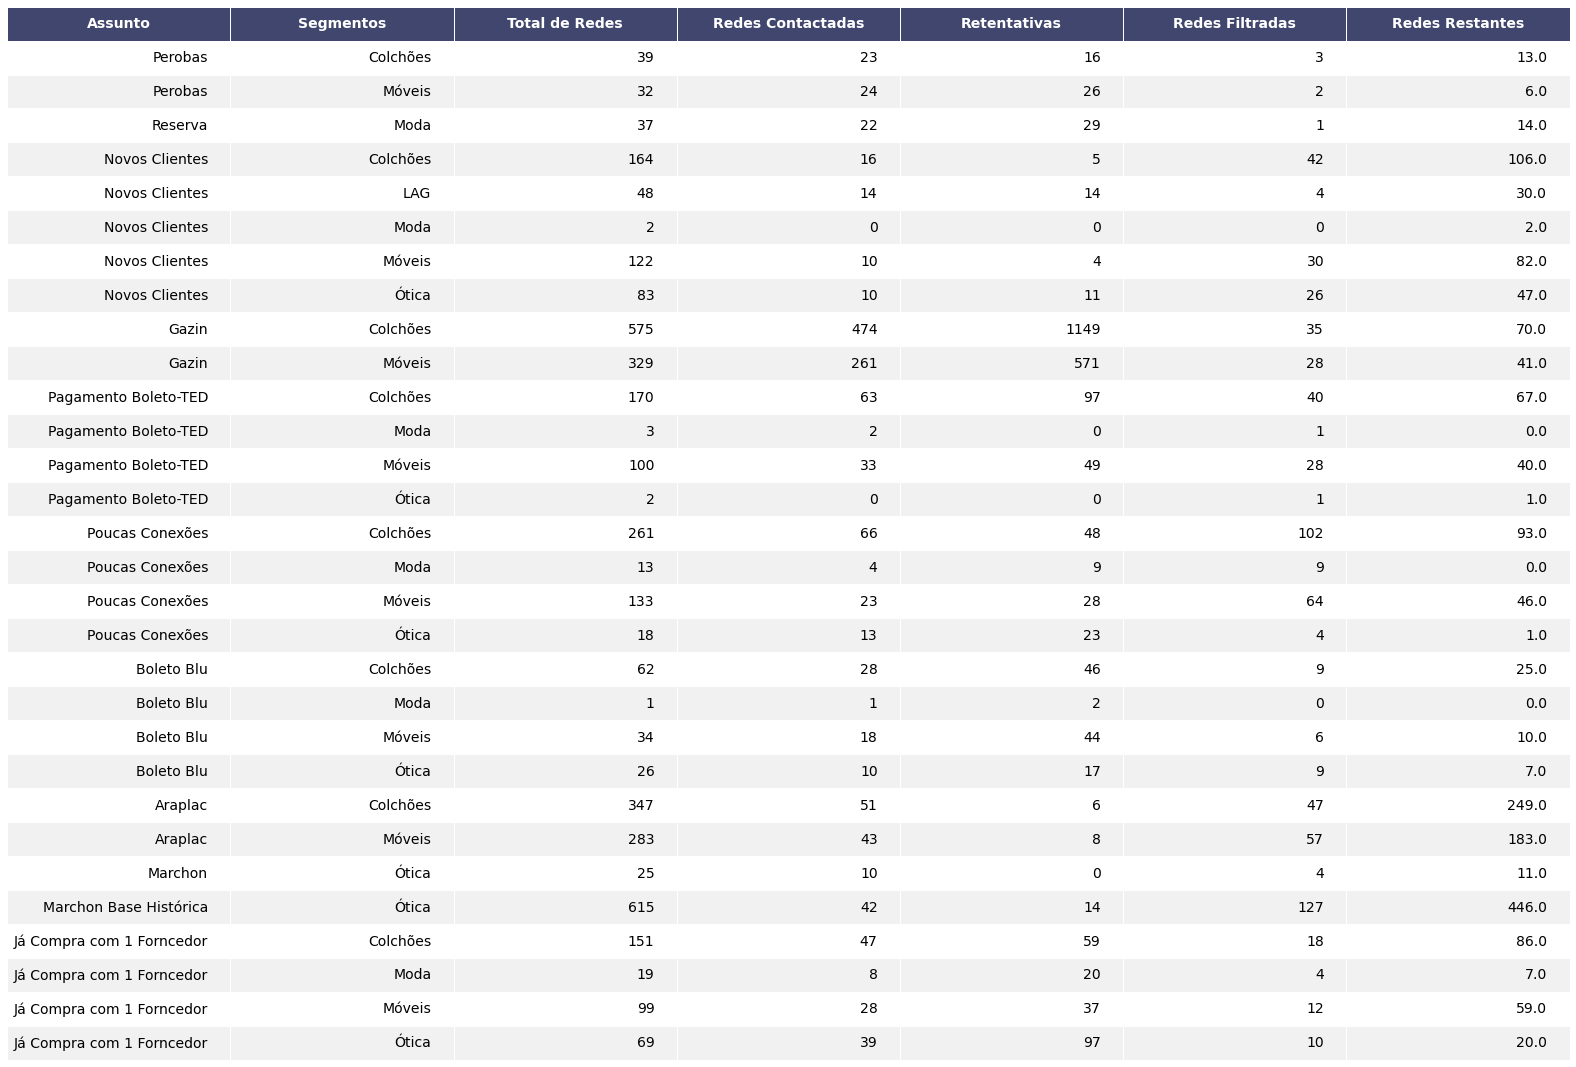

In [38]:
segmento_table = segmento_table[variables]
segmento_table_figure = render_mpl_table(segmento_table)
segmento_table_figure.figure.savefig('segmento_table_figure.png', bbox_inches='tight', pad_inches=0, dpi=199)

In [39]:
segmento_table

,Assunto,Segmentos,Total de Redes,Redes Contactadas,Retentativas,Redes Filtradas,Redes Restantes
0,Perobas,Colchões,39,23,16,3,13.0
1,Perobas,Móveis,32,24,26,2,6.0
2,Reserva,Moda,37,22,29,1,14.0
3,Novos Clientes,Colchões,164,16,5,42,106.0
4,Novos Clientes,LAG,48,14,14,4,30.0
5,Novos Clientes,Moda,2,0,0,0,2.0
6,Novos Clientes,Móveis,122,10,4,30,82.0
7,Novos Clientes,Ótica,83,10,11,26,47.0
8,Gazin,Colchões,575,474,1149,35,70.0
9,Gazin,Móveis,329,261,571,28,41.0


In [40]:

document = Document()

document.add_heading('Dia {} - Report de Tickets'.format(pd.to_datetime('today').strftime("%Y-%m-%d")), 0)


document.add_heading('Visão Geral', level=1)
#document.paragraphs[0].text

#document.add_paragraph('')


#document.add_paragraph('')
#paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_picture('segmento_table_figure.png', width=Inches(7.1))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER



document.save('./reports/segmento_table.docx')

In [41]:

document = Document()

document.add_heading('Dia {} - Report de Tickets'.format(pd.to_datetime('today').strftime("%Y-%m-%d")), 0)


document.add_heading('Assunto: Entendimento Boleto Blu Perobas', level=1)
document.paragraphs[0].text

document.add_paragraph('Número Total de Tickets: {}')

          
          
document.add_paragraph('Tickets Consumidos', style='List Number')
document.add_paragraph('Número de Tickets Negativados: {}', style='List Number')
#document.add_paragraph('Número de Lojistas sem Assessor Definido: {}'.format(number_null_emails), style='List Number')
document.add_paragraph('Tickets Restantes: {}', style='List Bullet')


paragraph = document.add_paragraph('Visão Macro')
paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_picture('cx_table_figure_perobas.png', width=Inches(7.1))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

FileNotFoundError: [Errno 2] No such file or directory: 'cx_table_figure_perobas.png'